In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

In [52]:
# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(2, 3, 1, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

In [53]:
ellip_base, type(ellip_base), ellip_base.shape

(array([[[ 7.02777778,  4.02777778,  3.02777778,  4.02777778,
           7.02777778],
         [ 6.25      ,  3.25      ,  2.25      ,  3.25      ,
           6.25      ],
         [ 5.69444444,  2.69444444,  1.69444444,  2.69444444,
           5.69444444],
         [ 5.36111111,  2.36111111,  1.36111111,  2.36111111,
           5.36111111],
         [ 5.25      ,  2.25      ,  1.25      ,  2.25      ,
           5.25      ],
         [ 5.36111111,  2.36111111,  1.36111111,  2.36111111,
           5.36111111],
         [ 5.69444444,  2.69444444,  1.69444444,  2.69444444,
           5.69444444],
         [ 6.25      ,  3.25      ,  2.25      ,  3.25      ,
           6.25      ],
         [ 7.02777778,  4.02777778,  3.02777778,  4.02777778,
           7.02777778]],
 
        [[ 5.77777778,  2.77777778,  1.77777778,  2.77777778,
           5.77777778],
         [ 5.        ,  2.        ,  1.        ,  2.        ,
           5.        ],
         [ 4.44444444,  1.44444444,  0.44444444,  1

In [33]:
x = np.asarray(ellip_base)

In [35]:
x.tolist()

[[[2.7000173611111116,
   2.5711111111111116,
   2.4500173611111116,
   2.3367361111111116,
   2.2312673611111116,
   2.1336111111111116,
   2.0437673611111116,
   1.9617361111111116,
   1.8875173611111116,
   1.8211111111111116,
   1.7625173611111116,
   1.7117361111111116,
   1.6687673611111116,
   1.6336111111111116,
   1.6062673611111116,
   1.5867361111111116,
   1.5750173611111116,
   1.5711111111111116,
   1.5750173611111116,
   1.5867361111111116,
   1.6062673611111116,
   1.6336111111111116,
   1.6687673611111116,
   1.7117361111111116,
   1.7625173611111116,
   1.8211111111111116,
   1.8875173611111116,
   1.9617361111111116,
   2.0437673611111116,
   2.1336111111111116,
   2.2312673611111116,
   2.3367361111111116,
   2.4500173611111116,
   2.5711111111111116,
   2.7000173611111116],
  [2.4900173611111116,
   2.3611111111111116,
   2.2400173611111116,
   2.1267361111111116,
   2.0212673611111116,
   1.9236111111111116,
   1.8337673611111116,
   1.7517361111111116,
   1.67751

In [55]:
ellip_base[:-1, ...]

array([[[ 7.02777778,  4.02777778,  3.02777778,  4.02777778,
          7.02777778],
        [ 6.25      ,  3.25      ,  2.25      ,  3.25      ,
          6.25      ],
        [ 5.69444444,  2.69444444,  1.69444444,  2.69444444,
          5.69444444],
        [ 5.36111111,  2.36111111,  1.36111111,  2.36111111,
          5.36111111],
        [ 5.25      ,  2.25      ,  1.25      ,  2.25      ,
          5.25      ],
        [ 5.36111111,  2.36111111,  1.36111111,  2.36111111,
          5.36111111],
        [ 5.69444444,  2.69444444,  1.69444444,  2.69444444,
          5.69444444],
        [ 6.25      ,  3.25      ,  2.25      ,  3.25      ,
          6.25      ],
        [ 7.02777778,  4.02777778,  3.02777778,  4.02777778,
          7.02777778]],

       [[ 5.77777778,  2.77777778,  1.77777778,  2.77777778,
          5.77777778],
        [ 5.        ,  2.        ,  1.        ,  2.        ,
          5.        ],
        [ 4.44444444,  1.44444444,  0.44444444,  1.44444444,
          4.4

In [ ]:
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(ellip_base, 0)

In [ ]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

In [ ]:
import mcubes
mcubes.export_obj(verts, faces, 'sphere.obj')

In [ ]:
import open3d as o3d
mesh = o3d.io.read_triangle_mesh("sphere.obj")
#o3d.visualization.draw_geometries([mesh])

In [23]:
ellip_base = ellip_base[0]
print(ellip_base)

IndexError: invalid index to scalar variable.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

z, x, y = ellip_base.nonzero()

fig = plt.figure()
ax = plt.axes(111, projection='3d')
#ax.scatter3D(x, y, z, cmap='Greens');
ax.plot(ellip_base[:,0], ellip_base[:,1], ellip_base[:,2])


TypeError: matplotlib.transforms.Bbox.from_bounds() argument after * must be an iterable, not int

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D

v= np.array(ellip_base)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2])
plt.show()

ValueError: input operand has more dimensions than allowed by the axis remapping

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 640x480 with 1 Axes>

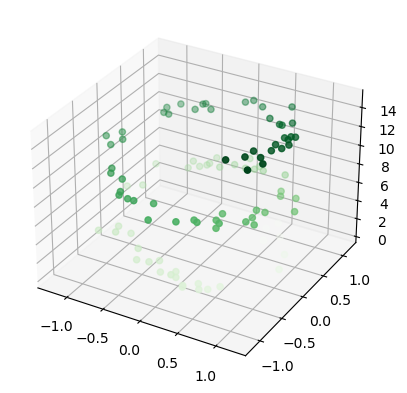

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()